In [1]:
# Assignment instructions

# Titanic competition: submission
# https://www.kaggle.com/c/titanic
# Points are assigned in a linear fashion according to the rank in the competition, from 10 to 20 pts. 
# If below 20 percentile of the overall ranking on the website, 0 points.
# You should not adapt solutions from others on the web: I will be asking random questions about the code, if I feel someone is unable to answer it will be 0 points
# Please attach the ipython notebook creating the submission to the homeworks and please also upload to your github repo 
# Good luck!

In [2]:
### Exploratory Analysis Section

In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)
tita = pd.read_csv(r'J:\Katie\Class\titanic\train.csv')

In [4]:
%matplotlib inline
tita.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tita.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
tita = tita.drop(columns=["Cabin","Ticket","Name"]) 

In [7]:
sample_incomplete_rows = tita[tita.isnull().any(axis=1)]

sample_incomplete_rows.shape

(179, 9)

In [8]:
tita = tita.dropna(subset=["Embarked"]) 
# Get rid of the whole attribute

In [9]:
sample_incomplete_rows = tita[tita.isnull().any(axis=1)]

sample_incomplete_rows.shape

(177, 9)

In [10]:
# option 3: Set the values to some value (zero, the mean, the median, etc.)
median = tita["Age"].median()
tita["Age"].fillna(median, inplace=True) 

In [11]:
sample_incomplete_rows = tita[tita.isnull().any(axis=1)]
sample_incomplete_rows.shape

(0, 9)

In [12]:
sex= tita[["Sex"]]

from sklearn.preprocessing import OneHotEncoder

Genderfit = OneHotEncoder(sparse=False)

SexOneHot = Genderfit.fit_transform(sex)

tita.insert(6,'Female', SexOneHot[:,0])
tita.insert(7,'Male', SexOneHot[:,1])
tita = tita.drop(columns=["Sex"]) 

In [13]:
location= tita[["Embarked"]]

from sklearn.preprocessing import OneHotEncoder

locfit = OneHotEncoder(sparse=False)

locOneHot = locfit.fit_transform(location)

tita.insert(9,'Cherbourg', locOneHot[:,0])
tita.insert(9,'Queenstown', locOneHot[:,1])
tita.insert(9,'Southampton', locOneHot[:,2])
tita = tita.drop(columns=["Embarked"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229FC3EA6D8>,
      dtype=object)

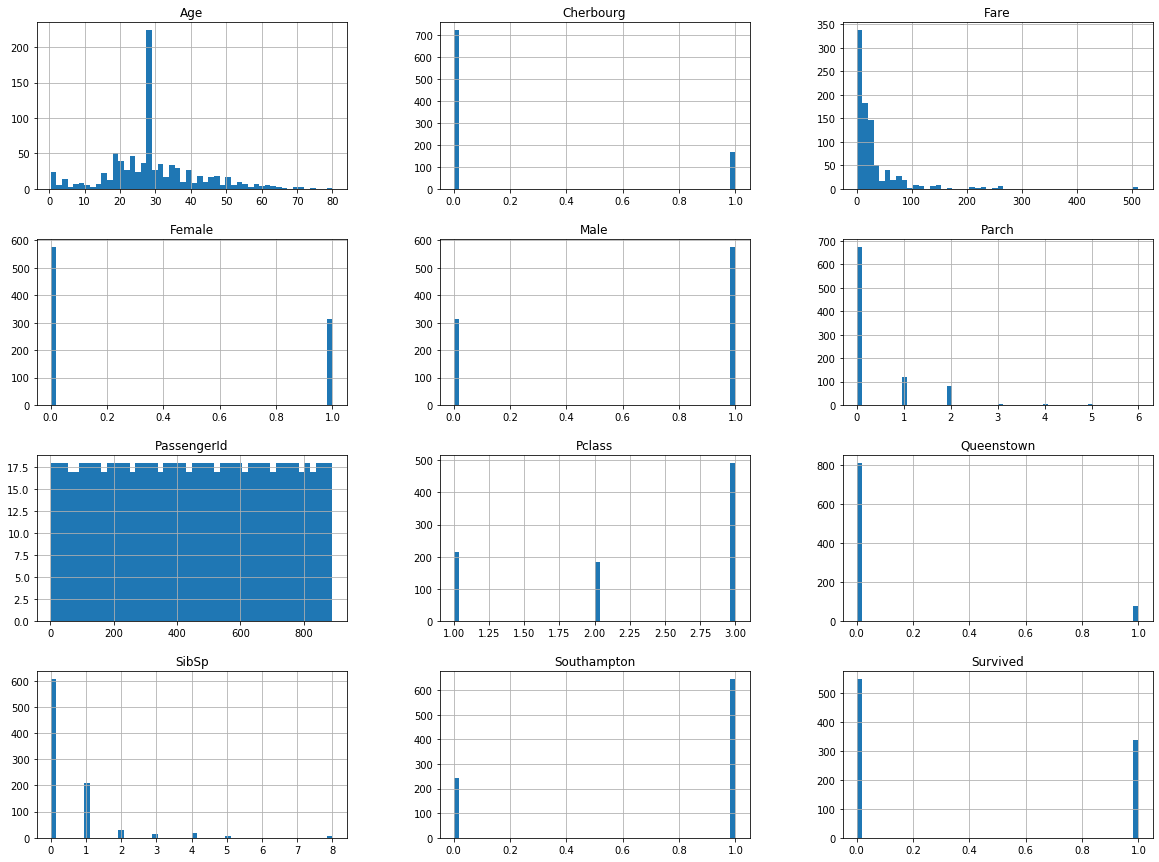

In [14]:
tita.hist(bins=50, figsize=(20,15))

In [15]:
corr_matrix = tita.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Female         0.541585
Fare           0.255290
Cherbourg      0.169966
Parch          0.083151
Queenstown     0.004536
PassengerId   -0.005028
SibSp         -0.034040
Age           -0.069822
Southampton   -0.151777
Pclass        -0.335549
Male          -0.541585
Name: Survived, dtype: float64

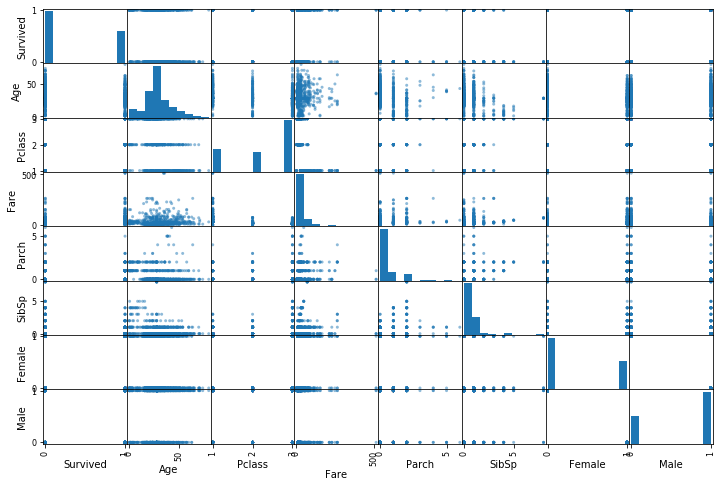

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Age", "Pclass",
              "Fare", "Parch", "SibSp", "Female", "Male"]
_ = scatter_matrix(tita[attributes], figsize=(12, 8))

In [17]:
### Creating my Pipeline

In [18]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

# Define Pipeline
pipeline = ColumnTransformer([
    ('Replace Age Nans', Pipeline([('imputer', SimpleImputer(strategy = 'mean'))]), ['Age']),
    ('Replace Fare Nans', Pipeline([('imputer', SimpleImputer(strategy = 'mean'))]), ['Fare']),
    ('One Hot Encode Sex', Pipeline([('onehot', OneHotEncoder())]), ['Sex']),
    ('One Hot Encode Embarked', Pipeline([('onehot', OneHotEncoder())]), ['Embarked'])
    ])

In [19]:
### Lets run our ML Model now

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [21]:
train = pd.read_csv(r'J:\Katie\Class\titanic\train.csv')

# Drop two rows undefined
train = train.dropna(subset=["Embarked"]) 

#Use Pipeline
X_train = pipeline.fit_transform(train)
Y_train = train['Survived']

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=5)
forest_clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
Y_train_pred = cross_val_predict(forest_clf, X_train, Y_train)
Y_train_pred_val = cross_val_score(forest_clf, X_train, Y_train, scoring='accuracy')
confusion_matrix(Y_train, Y_train_pred)
f1_score(Y_train, Y_train_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6926536731634183

In [24]:
from sklearn.naive_bayes import MLPClassifier
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, Y_train)

ImportError: cannot import name 'MLPClassifier' from 'sklearn.naive_bayes' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py)

In [ ]:
Y_train_pred = cross_val_predict(mlp_clf, X_train, Y_train)
Y_train_pred_val = cross_val_score(mlp_clf, X_train, Y_train, scoring='accuracy')
confusion_matrix(Y_train, Y_train_pred)
f1_score(Y_train, Y_train_pred)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(penalty ="l2", alpha=0.0002)
sgd_clf.fit(X_train, Y_train)

In [ ]:
Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train)
Y_train_pred_val = cross_val_score(sgd_clf, X_train, Y_train, scoring='accuracy')
confusion_matrix(Y_train, Y_train_pred)
f1_score(Y_train, Y_train_pred)

In [ ]:
### Use Random Forest Classifier on Data

In [ ]:
train = pd.read_csv(r'J:\Katie\Class\titanic\train.csv')
xtest = pd.read_csv(r'J:\Katie\Class\titanic\test.csv').sort_values(by='PassengerId')

# Drop two rows undefined
train = train.dropna(subset=["Embarked"]) 

#Use Pipeline
x_train = pipeline.fit_transform(train)
y_train = train['Survived']

x_test = pipeline.fit_transform(xtest)

## Random Forest
forest_clf = RandomForestClassifier(n_estimators = 15)
forest_clf.fit(x_train, y_train)
answer = forest_clf.predict(x_test)

#Save to csv
save = pd.DataFrame({'PassengerId':xtest['PassengerId'], 'Survived':answer})    
save.to_csv('test5.csv', index=False)